# 911 Calls Capstone Project

Data is taken from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:
- lat : String variable, Latitude
- lng: String variable, Longitude
- desc: String variable, Description of the Emergency Call
- zip: String variable, Zipcode
- title: String variable, Title
- timeStamp: String variable, YYYY-MM-DD HH:MM:SS
- twp: String variable, Township
- addr: String variable, Address
- e: String variable, Dummy variable (always 1)

## **Data and Setup**

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tkr
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties
import calendar 
import datetime
import seaborn as sns
import folium
%matplotlib inline

In [2]:
os.chdir(r"J:\Learning Data Science\Python\Udemy Course\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\10-Data-Capstone-Projects")

### Loading the dataset

In [3]:
df = pd.read_csv("911.csv")

### Looking at the first few rows of the dataset

In [4]:
df.sample(5)

lat        lng  \
381031  40.104126 -75.233924   
17877   40.266079 -75.244149   
536237  40.076947 -75.132172   
378539  40.119132 -75.113286   
506742  40.403073 -75.499864   

                                                     desc      zip  \
381031  STENTON AVE & CRICKET RD; WHITEMARSH; 2018-08-...  19444.0   
17877   RICHARDSON RD; MONTGOMERY; 2016-01-24 @ 17:48:...  19446.0   
536237  ELKINS AVE & WHITEWOOD RD;  CHELTENHAM; Statio...  19027.0   
378539  HUNTINGDON RD & BRENTWOOD RD; ABINGTON; 2018-0...  19001.0   
506742  MAIN ST & CHURCH ST;  EAST GREENVILLE; Station...  18041.0   

                                     title        timeStamp              twp  \
381031  Traffic: HAZARDOUS ROAD CONDITIONS    8/8/2018 1:35       WHITEMARSH   
17877                   Fire: VEHICLE FIRE  1/24/2016 17:48       MONTGOMERY   
536237                     EMS: CVA/STROKE  8/19/2019 19:45       CHELTENHAM   
378539                    Fire: FIRE ALARM   8/1/2018 16:05         ABINGTON   
506742                EMS: SUBJECT IN PAIN   6/10/2019 6:52  EAST GREENVILLE   

                                addr  e  
381031      STENTON AVE & CRICKET RD  1  
17877                  RICHARDSON RD  1  
536237     ELKINS AVE & WHITEWOOD RD  1  
378539  HUNTINGDON RD & BRENTWOOD RD  1  
506742           MAIN ST & CHURCH ST  1

### To look at the concise summary of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


### Converting timeStamp to DateTime64 format

In [6]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 45.6+ MB


## **Feature Creation and Data Exploration**

### Missing Value Count

In [8]:
print('Missing values:',df.isnull().values.sum())
df.isnull().sum()

Missing values: 80492


lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

### Top 5 zipcodes for 911 calls

In [9]:
top5_zip = pd.DataFrame(df.groupby("zip").count()[
             "timeStamp"].sort_values(ascending=False).head(5))
top5_zip.columns = ["Frequency of Calls"]
top5_zip
top5_zip.style.background_gradient(cmap='Reds')

### Top 5 Towns for 911 calls

In [10]:
top5_towns = pd.DataFrame(df.groupby("twp").count()[
             "timeStamp"].sort_values(ascending=False).head(5))
top5_towns.columns = ["Frequency of Calls"]
top5_towns.style.background_gradient(cmap='Reds')

### Top 5 Hours of the Day for 911 calls

In [11]:
# Extracting hour from the time stamp
df["Hour"] = df.timeStamp.dt.hour
df.head(5)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:00         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:00   LOWER POTTSGROVE   

                         addr  e  Hour  
0      REINDEER CT & DEAD END  1    17  
1  BRIAR PATH & WHITEMARSH LN  1    17  
2                    HAWS AVE  1    14  
3          AIRY ST & SWEDE ST  1    16  
4    CHERRYWOOD CT & DEAD END  1    16

In [12]:
top5_hour = pd.DataFrame(df.groupby("Hour").count()[
             "timeStamp"].sort_values(ascending=False).head(5))
top5_hour.columns = ["Frequency of Calls"]
top5_hour.style.background_gradient(cmap='Reds')

### Top 5 Days for 911 Calls

In [13]:
# Extracting the day of the week from the timeStamp column
df["DayOfWeek"] = df["timeStamp"].dt.day_name().astype(str).str[0:3]
df.head(3)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:00         NORRISTOWN   

                         addr  e  Hour DayOfWeek  
0      REINDEER CT & DEAD END  1    17       Thu  
1  BRIAR PATH & WHITEMARSH LN  1    17       Thu  
2                    HAWS AVE  1    14       Thu

In [14]:
top5_DayOfWeek = pd.DataFrame(df.groupby("DayOfWeek").count()[
             "timeStamp"].sort_values(ascending=False).head(5))
top5_DayOfWeek.columns = ["Frequency of Calls"]
top5_DayOfWeek.style.background_gradient(cmap='Reds')

### Top 5 Months for 911 Calls

In [15]:
# Extracting the Month Name from the timeStamp column
df["MonthName"] = df["timeStamp"].dt.month_name().astype(str)

# Extracting the year from timeStamp column
df["Year"] =df["timeStamp"].dt.year

df.head(3)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:00         NORRISTOWN   

                         addr  e  Hour DayOfWeek MonthName  Year  
0      REINDEER CT & DEAD END  1    17       Thu  December  2015  
1  BRIAR PATH & WHITEMARSH LN  1    17       Thu  December  2015  
2                    HAWS AVE  1    14       Thu  December  2015

In [16]:
top5_Months = pd.DataFrame(df.groupby("MonthName").count()[
             "timeStamp"].sort_values(ascending=False).head(5))
top5_Months.columns = ["Frequency of Calls"]
top5_Months.style.background_gradient(cmap='Reds')

### Adding a column for the reason of 911 Call

In [17]:
df["Reason"]=df['title'].apply(lambda title: title.split(':')[0])
df["Reason_Categ"]=df['title'].apply(lambda title: title.split(':')[1])
df.sample(5)

lat        lng  \
415935  40.008680 -75.210760   
484871  40.081542 -75.144358   
402148  40.241320 -75.242828   
52586   40.093043 -75.296867   
507099  40.299491 -75.585159   

                                                     desc      zip  \
415935  E CITY AVE & PRESIDENTIAL BLVD; LOWER MERION; ...  19004.0   
484871  WASHINGTON LN;  CHELTENHAM; Station 358; 2019-...      NaN   
402148  BETHLEHEM PIKE & NORTH WALES RD; MONTGOMERY; 2...  19454.0   
52586   WILMER AVE & BURKE AVE;  PLYMOUTH; Station 308...  19428.0   
507099  CHARLOTTE ST & SWAMP PIKE;  NEW HANOVER; Stati...  19525.0   

                            title           timeStamp           twp  \
415935  Traffic: VEHICLE ACCIDENT 2018-11-01 06:36:00  LOWER MERION   
484871      EMS: VEHICLE ACCIDENT 2019-04-17 12:40:00    CHELTENHAM   
402148  Traffic: VEHICLE ACCIDENT 2018-09-28 20:00:00    MONTGOMERY   
52586    EMS: MEDICAL ALERT ALARM 2016-04-25 09:01:00      PLYMOUTH   
507099   EMS: EMS SPECIAL SERVICE 2019-06-10 19:24:00   NEW HANOVER   

                                   addr  e  Hour DayOfWeek  MonthName  Year  \
415935   E CITY AVE & PRESIDENTIAL BLVD  1     6       Thu   November  2018   
484871                    WASHINGTON LN  1    12       Wed      April  2019   
402148  BETHLEHEM PIKE & NORTH WALES RD  1    20       Fri  September  2018   
52586            WILMER AVE & BURKE AVE  1     9       Mon      April  2016   
507099        CHARLOTTE ST & SWAMP PIKE  1    19       Mon       June  2019   

         Reason          Reason_Categ  
415935  Traffic      VEHICLE ACCIDENT  
484871      EMS      VEHICLE ACCIDENT  
402148  Traffic      VEHICLE ACCIDENT  
52586       EMS   MEDICAL ALERT ALARM  
507099      EMS   EMS SPECIAL SERVICE

### Dates Range

In [18]:
dates_range = {'Date':[min(df.timeStamp),max(df.timeStamp)]}
df_dates_range = pd.DataFrame(dates_range, index =['Earliest Date','Latest Date'])
df_dates_range

Date
Earliest Date 2015-12-10 14:39:00
Latest Date   2020-07-29 15:54:00

## **Data Visualization**

### Most Common reasons for 911 Calls

In [19]:
ReasonsCount = pd.DataFrame(df.groupby("Reason").count()[
             "timeStamp"].sort_values(ascending=False))
ReasonsCount

timeStamp
Reason            
EMS         332692
Traffic     230208
Fire        100622

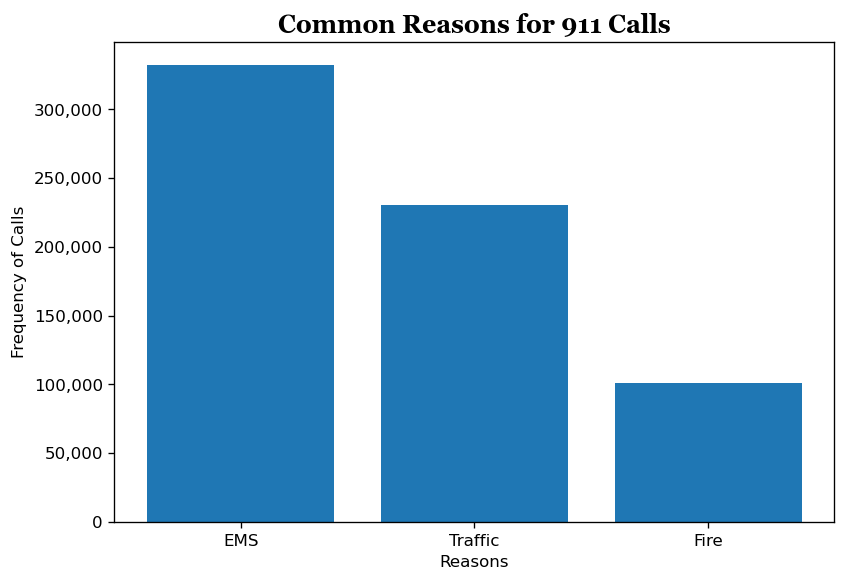

In [20]:
fig = plt.figure(dpi=120)
ax = fig.add_axes([0,0,1,1])
ax.bar(ReasonsCount.index,ReasonsCount.timeStamp)
ax.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
plt.title("Common Reasons for 911 Calls",fontdict={'fontname': 'Georgia', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel("Reasons")
plt.ylabel("Frequency of Calls")
plt.show()

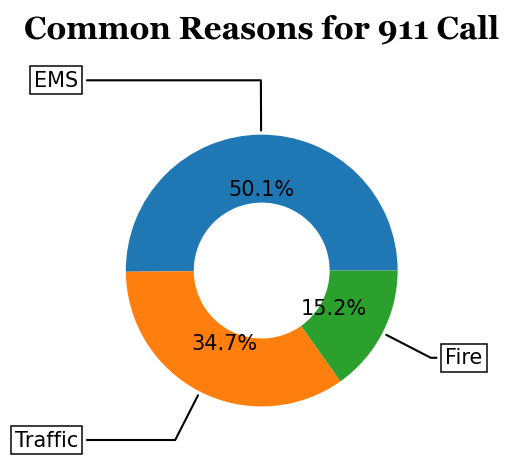

In [21]:
# Adding a column for percentage
ReasonsCount["Percent"] = round(
    ReasonsCount.timeStamp*100/sum(ReasonsCount.timeStamp), 2)

fig, ax = plt.subplots(figsize=(6, 3), dpi=150)

recipe = ReasonsCount.index

data = ReasonsCount.timeStamp

wedges, texts,_ = ax.pie(data, wedgeprops=dict(width=0.5),autopct="%.1f%%"
                       )

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i],xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
ax.set_title("Common Reasons for 911 Call", y=1.3, pad=-19,
             fontdict={'fontname': 'Georgia', 'fontsize': 15, 'fontweight': 'bold'})

plt.show()

### Top 5 Reasons (per Category) for 911 Calls

In [22]:
df_top5Reasons = pd.DataFrame(df.groupby(["Reason","Reason_Categ"]).count()["timeStamp"].sort_values(ascending=False))

In [23]:
df_top5Reasons = df_top5Reasons.reset_index()
df_top5Reasons.head(3)
##df_top5Reasons = df.set_index('Reason_Categ').groupby("Reason")['timeStamp'].nlargest(5).reset_index()

Reason       Reason_Categ  timeStamp
0  Traffic   VEHICLE ACCIDENT     148372
1  Traffic   DISABLED VEHICLE      47909
2     Fire         FIRE ALARM      38336

In [73]:
df_top5Reasons_perCateg = df_top5Reasons.set_index(['Reason_Categ']).groupby('Reason')['timeStamp'].nlargest(3).reset_index() 

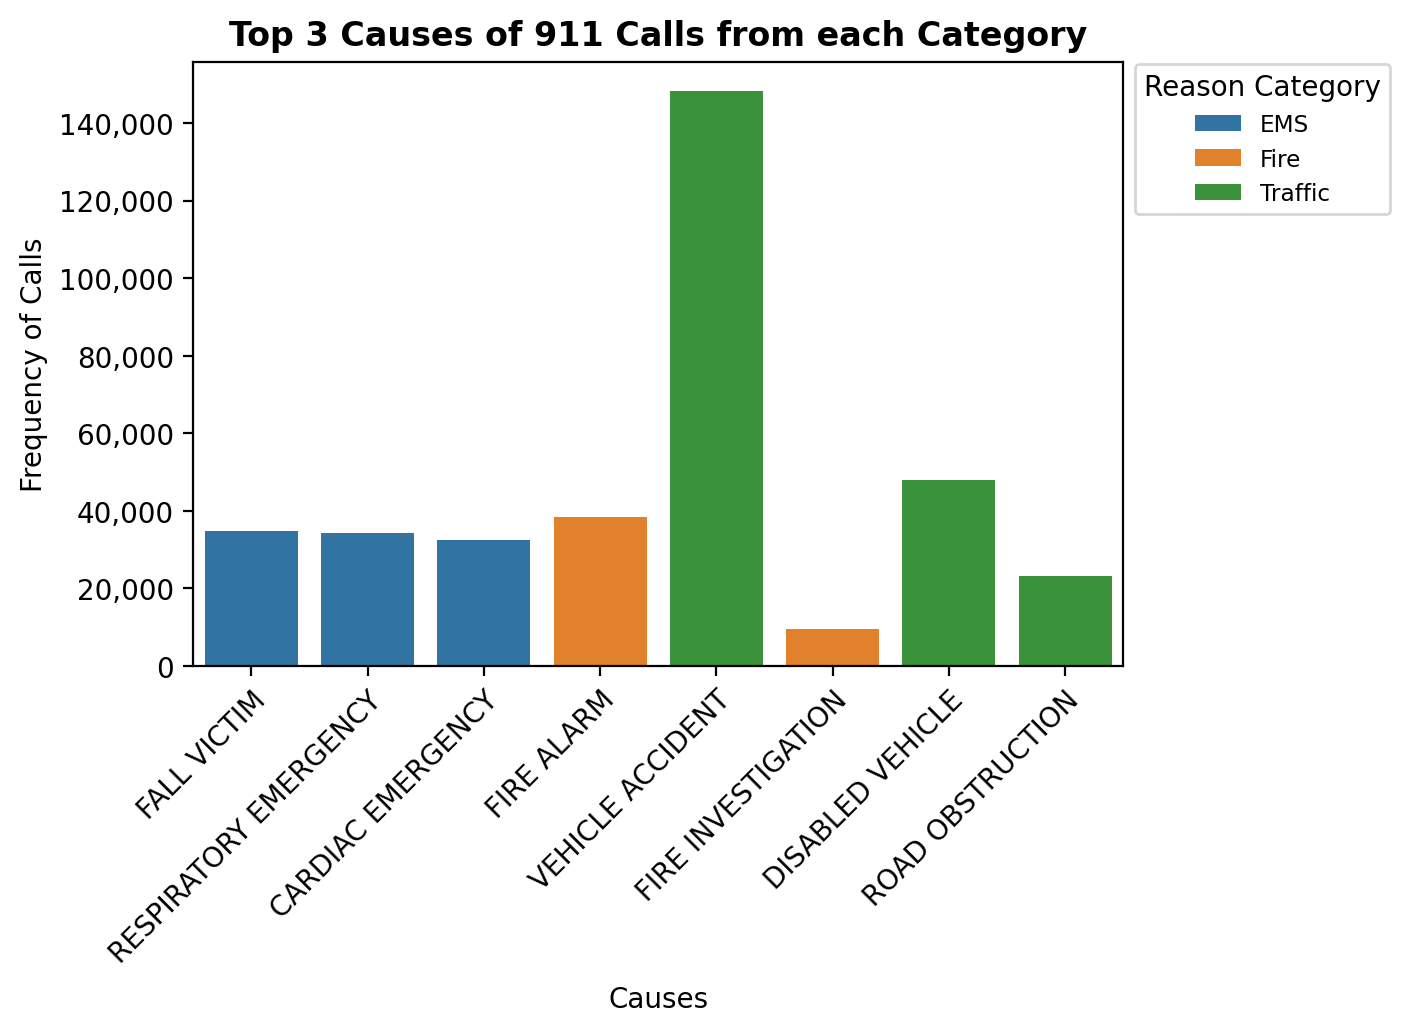

In [72]:
ax, fig = plt.subplots(dpi=200)
ax = sns.barplot(x="Reason_Categ", y="timeStamp", hue="Reason",
                data=df_top5Reasons_perCateg, dodge=False)
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor")
#plt.yticks(np.arange(0, 160000, step=5000)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Top 3 Causes of 911 Calls from each Category",fontweight="bold")
plt.ylabel("Frequency of Calls")
plt.xlabel("Causes")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Reason Category', bbox_to_anchor=(1, 1.015), loc='upper left',prop=fontP)
plt.show()

### Variation of 911 Calls over time (Jan 2016 - Dec 2019)

In [26]:
# Creating a dataframe
df_monthly_calls = pd.DataFrame(df[(df.timeStamp.dt.year>min(df.timeStamp.dt.year)) & (df.timeStamp.dt.year<max(df.timeStamp.dt.year))].groupby(["MonthName", "Reason"])["timeStamp"].count())

# Creating  Pivot Table
df_monthly_calls_pivot = df_monthly_calls.pivot_table(index=["MonthName"],columns="Reason",values="timeStamp")

# Rearranging the index
df_monthly_calls_pivot = df_monthly_calls_pivot.reindex(["January", "February", "March","April","May", 
                                                         "June", "July", "August", "September", "October",
                                                         "November","December",])

# Conditional Formatting
df_monthly_calls_pivot.style.background_gradient(cmap='Reds')


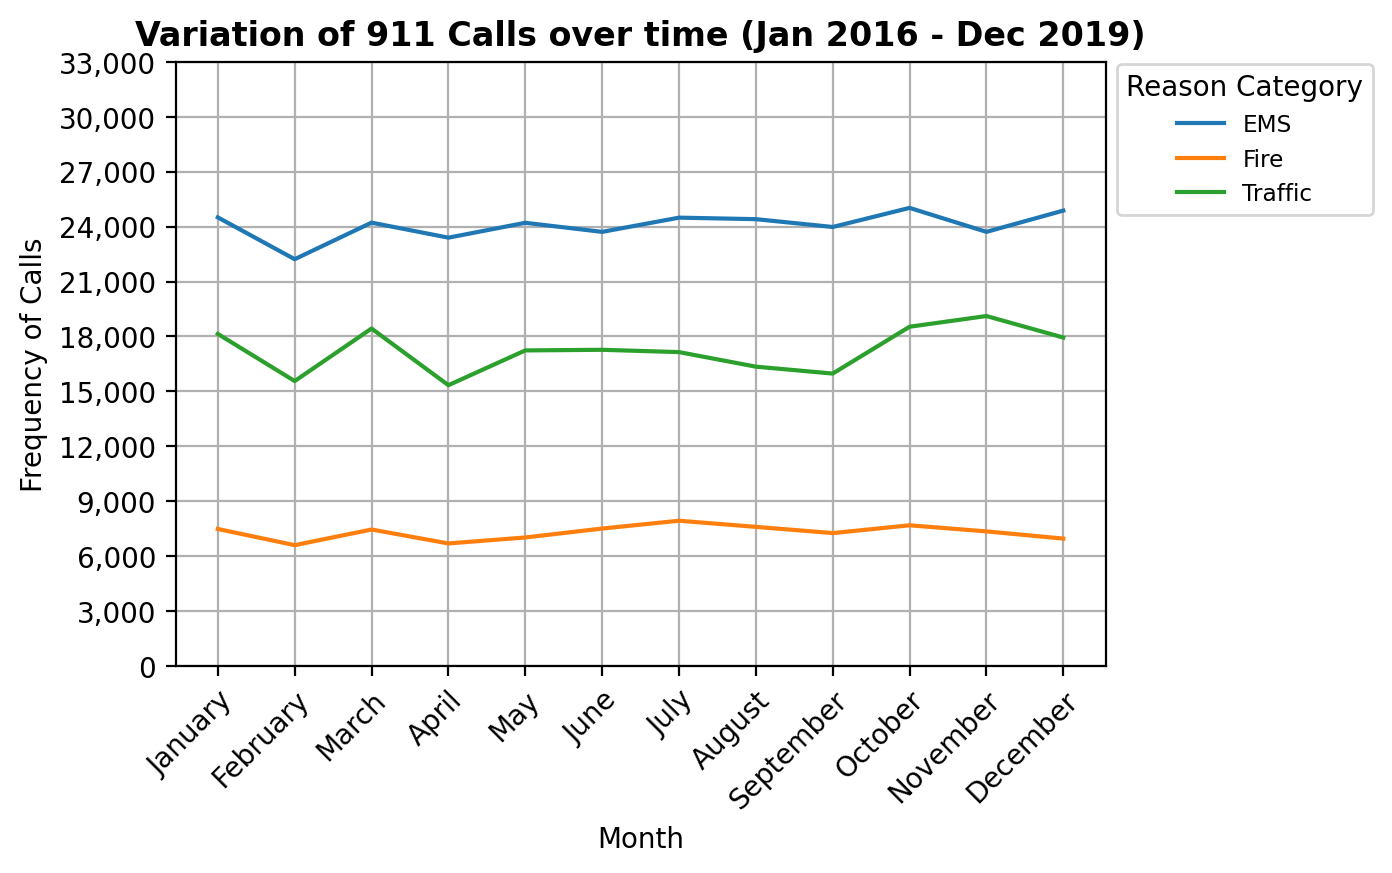

In [27]:
fig, ax = plt.subplots(dpi=200)
for count in df_monthly_calls_pivot.iloc[:,0:].columns.to_list():
    plt.plot(df_monthly_calls_pivot.index.to_list(), df_monthly_calls_pivot.iloc[:,0:][count], label = count)
    
plt.yticks(np.arange(0, 35000, step=3000))
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Variation of 911 Calls over time (Jan 2016 - Dec 2019)",fontweight="bold")
plt.ylabel("Frequency of Calls")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Reason Category', bbox_to_anchor=(1, 1.015), loc='upper left',prop=fontP)
plt.grid()
plt.show()

In [28]:
# Creating a dataframe
df_yearly_calls = pd.DataFrame(df[(df.timeStamp.dt.year>min(df.timeStamp.dt.year)) & (df.timeStamp.dt.year<max(df.timeStamp.dt.year))].groupby(["Year", "Reason"])["timeStamp"].count())

# Creating  Pivot Table
df_yearly_calls_pivot = df_yearly_calls.pivot_table(index=["Year"],columns="Reason",values="timeStamp")

df_yearly_calls_pivot.style.background_gradient(cmap='Reds')

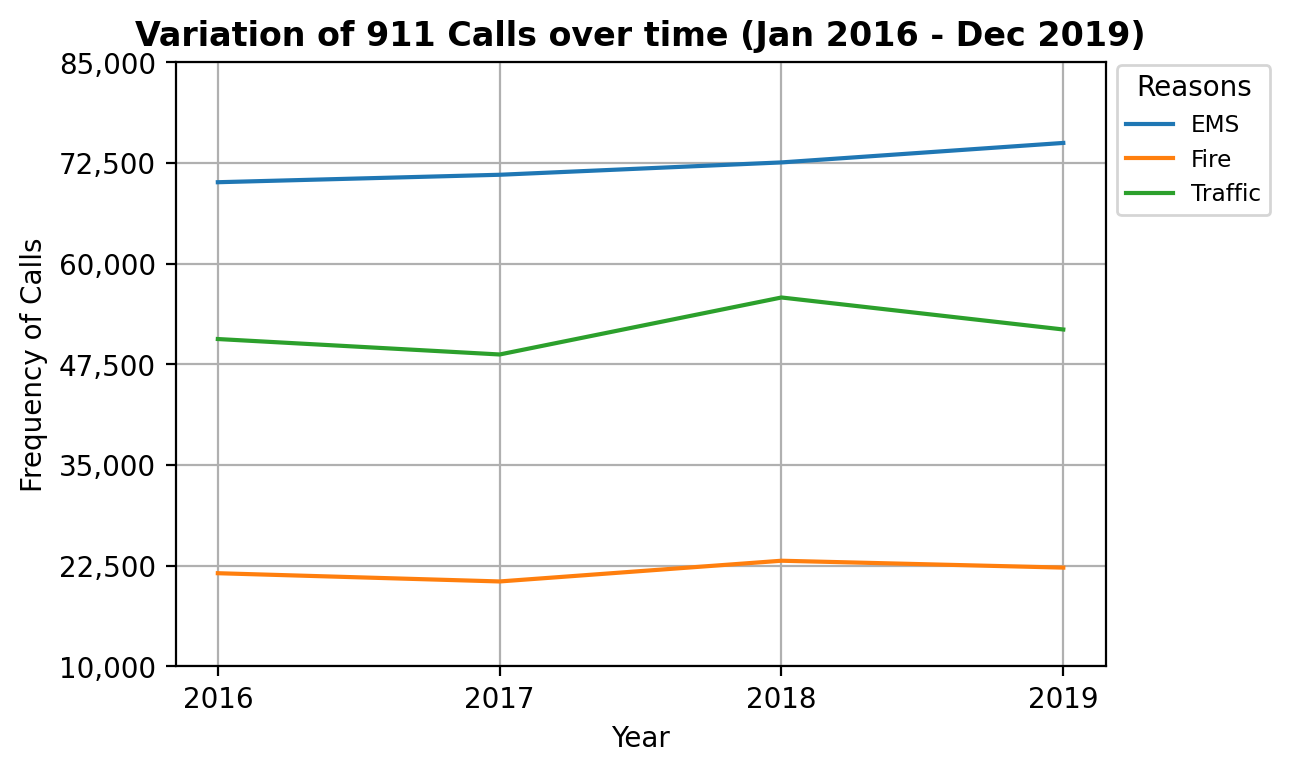

In [29]:
fig, ax = plt.subplots(dpi=200)
for count in df_yearly_calls_pivot.iloc[:,0:].columns.to_list():
    plt.plot(df_yearly_calls_pivot.index.to_list(), df_yearly_calls_pivot.iloc[:,0:][count], label = count)
    
plt.yticks(np.arange(10000, 87000, step=12500))
plt.xticks(np.arange(2016, 2020, step=1),
         rotation_mode="anchor")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Variation of 911 Calls over time (Jan 2016 - Dec 2019)",fontweight="bold")
plt.ylabel("Frequency of Calls")
plt.xlabel("Year")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Reasons', bbox_to_anchor=(1, 1.015), loc='upper left',prop=fontP)
plt.grid()
plt.show()

### Heatmap

In [30]:
# Creating a dataframe
df_month_Year_calls = pd.DataFrame(df[(df.timeStamp.dt.year>min(df.timeStamp.dt.year)) & (df.timeStamp.dt.year<max(df.timeStamp.dt.year))].groupby(["Year", "MonthName"])["timeStamp"].count())

# Creating  Pivot Table
df_month_Year_calls_pivot = df_month_Year_calls.pivot_table(index=["Year"],columns="MonthName",values="timeStamp")

# Rearranging the index
df_month_Year_calls_pivot=df_month_Year_calls_pivot[["January", "February", "March","April","May","June", "July", "August", "September", "October", "November","December"]]

# Conditional Formatting
df_month_Year_calls_pivot.style.background_gradient(cmap='Reds')

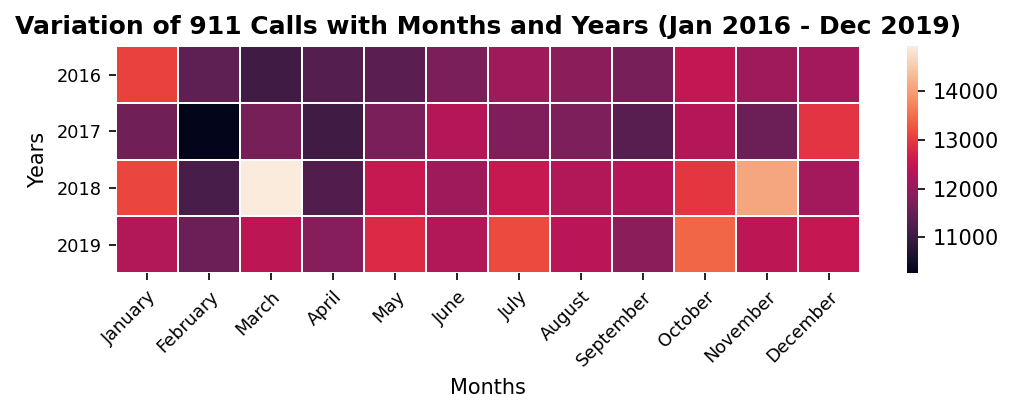

In [31]:
pyplot.figure(figsize=(8, 2),dpi=150)
ax = sns.heatmap(df_month_Year_calls_pivot,linewidths=.5)
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor", size=8.5)
plt.yticks(size=8.5, rotation = 360)
plt.xlabel("Months")
plt.ylabel("Years")
plt.title("Variation of 911 Calls with Months and Years (Jan 2016 - Dec 2019)",fontweight="bold")
plt.show()

In [32]:
# Creating a dataframe
df_day_hour_calls = pd.DataFrame(df[(df.timeStamp.dt.year>min(df.timeStamp.dt.year)) & (df.timeStamp.dt.year<max(df.timeStamp.dt.year))].groupby(["DayOfWeek", "Hour"])["timeStamp"].count())

# Creating  Pivot Table
df_day_hour_calls_pivot = df_day_hour_calls.pivot_table(index=["Hour"],columns="DayOfWeek",values="timeStamp")

# Rearranging the index
df_day_hour_calls_pivot=df_day_hour_calls_pivot[["Mon", "Tue", "Wed","Thu","Fri", "Sat", "Sun"]]

# Conditional Formatting
df_day_hour_calls_pivot.style.background_gradient(cmap='Reds')

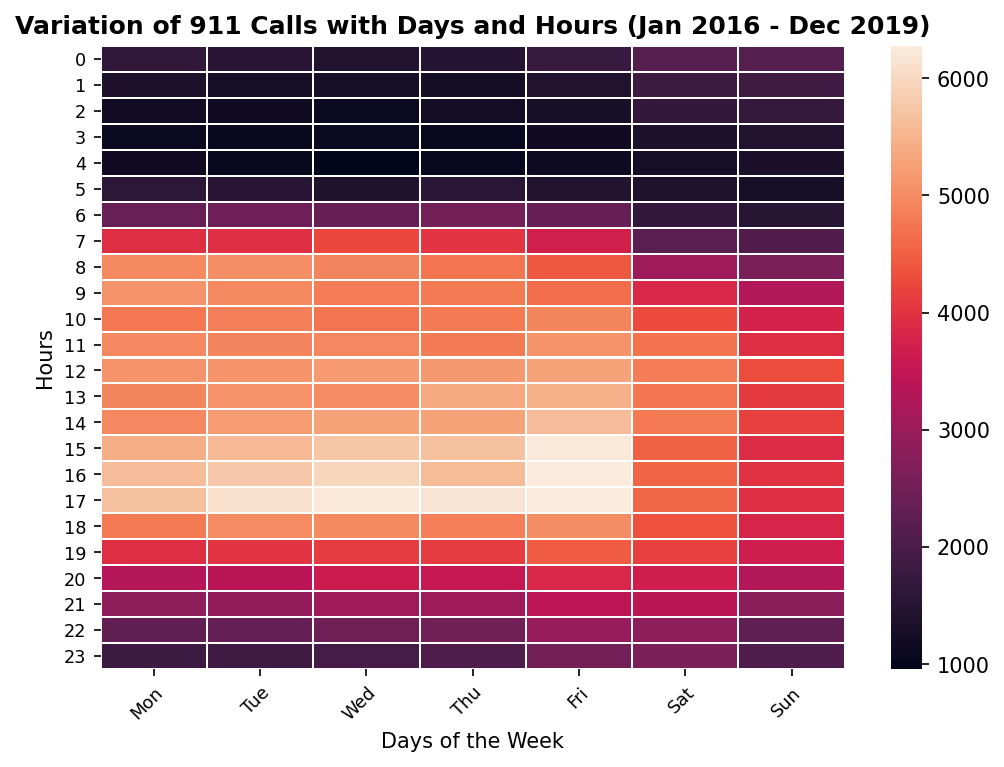

In [33]:
pyplot.figure(figsize=(8, 5.5),dpi=150)
ax = sns.heatmap(df_day_hour_calls_pivot,linewidths=.5)
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor", size=8.5)
plt.yticks(size=8.5, rotation = 360)
plt.xlabel("Days of the Week")
plt.ylabel("Hours")
plt.title("Variation of 911 Calls with Days and Hours (Jan 2016 - Dec 2019)",fontweight="bold")
plt.show()

### Locations from where 911 calls were placed

In [34]:
df_coords_filter = df[(df.lng<-70) & (df.lng>-80)]

In [35]:
# Creating a bounding box
BBox = ((df_coords_filter.lng.min(),df_coords_filter.lng.max(),df_coords_filter.lat.min(), df_coords_filter.lat.max()))
BBox

(-79.6158772, -71.8022934, 38.67623270000001, 42.262593200000005)

In [36]:
# Plotting the location of first 50,000 calls
m = folium.Map(location=[40.201327,-75.33022],height=350, width=400)

for la,lo in zip(df_coords_filter.lat[0:5000].values,df_coords_filter.lng[0:5000].values):
    folium.Circle(
    radius=60,
    location=[la,lo],
    color="crimson",
    fill=False,prefer_canvas=True
    ).add_to(m)
    
m

## **Conclusion**

This dataset helped us understand the emergency frequency due to natural causes (health issues, etc.) and human mistakes(fire accident, road accident, etc.). The dataset was acquired from Kaggle. There were about 80,000 missing values. Most of them were from the zip code column. 

The most common cause of 911 calls is EMS, followed by Traffic and Fire. EMS accounts for about 50% of the total calls. The EMS-related calls appear to be linearly increasing over the years. On investigating the causes further, it was found that Vehicle Accident is responsible for the highest number of the emergency call. During the data manipulation phase, month, day, hour, and year were extracted from the date. It was found out that most of the 911 calls were placed in the month of January, followed by June and March.

The heatmap indicates that the highest number of 911 calls were made in March 2018. It looks like most number of calls were placed between Tuesday - Friday around 5 pm. On investigating the location of the calls, Lower Merion is the town with the highest number of calls.

-- **Deepansh Arora**